In [2]:
!pip install tabula-py
print ('tabula-py installed')

     |████████████████████████████████| 10.4MB 6.5MB/s eta 0:00:01    |▉                               | 266kB 6.5MB/s eta 0:00:02
     |████████████████████████████████| 10.1MB 59.3MB/s eta 0:00:01
ERROR: autoai-libs 1.10.5 has requirement numpy>=1.16.4, but you'll have numpy 1.15.4 which is incompatible.
  Found existing installation: pandas 0.24.1
    Uninstalling pandas-0.24.1:
      Successfully uninstalled pandas-0.24.1
tabula-py installed


In [1]:
!conda install -c conda-forge folium=0.5.0 --yes
print ('folium installed')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    certifi-2019.11.28         |   py36h9f0ad1d_1         149 KB  conda-forge
    branca-0.4.0               |             py_0          26 KB  conda-forge
    altair-4.0.1               |             py_0         575 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    ------------------------------------------------------------
                       

In [3]:
!conda install -c conda-forge geopy --yes
print ('geopy installed')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          92 KB

The following NEW packages will be INSTALLED:

    geographiclib: 1.50-py_0   conda-forge
    geopy:         1.21.0-py_0 conda-forge


geographiclib-1.50   | 34 KB     | ##################################### | 100% 
geopy-1.21.0         | 58 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
geopy installed


In [4]:
!pip install matplotlib

In [5]:
!pip install -U scikit-learn

     |████████████████████████████████| 7.1MB 6.0MB/s eta 0:00:01
     |████████████████████████████████| 296kB 58.3MB/s eta 0:00:01
ERROR: autoai-libs 1.10.5 has requirement numpy>=1.16.4, but you'll have numpy 1.15.4 which is incompatible.
ERROR: autoai-libs 1.10.5 has requirement scikit-learn==0.20.3, but you'll have scikit-learn 0.22.2.post1 which is incompatible.
  Found existing installation: scikit-learn 0.20.3
    Uninstalling scikit-learn-0.20.3:
      Successfully uninstalled scikit-learn-0.20.3


In [6]:
import tabula
from tabula import read_pdf
from tabula import convert_into

import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib as mpl
import matplotlib.pyplot as plt



#import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [7]:
# The code was removed by Watson Studio for sharing.

,Figure i. Number of Counted Homeless Persons by County and Percentage of State Total,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,County,Total\rHomeless\rPersons,% of Total\rHomeless\rPersons,Chronic\rHomeless\rPersons,% of\rChronic\rHomeless\rPersons,Unsheltered\rHomeless\rPersons,% of\rUnsheltered\rHomeless\rPersons
1,Atlantic,437,0.05,105,0.08,131,0.08
2,Bergen,354,0.04,11,0.01,23,0.01
3,Burlington,840,0.09,81,0.06,56,0.03
4,Camden,577,0.06,100,0.08,84,0.05
5,Cape May,103,0.01,13,0.01,8,0
6,Cumberland,156,0.02,25,0.02,35,0.02
7,Essex,2229,0.24,250,0.19,396,0.24
8,Gloucester,144,0.02,8,0.01,18,0.01
9,Hudson,860,0.09,226,0.17,243,0.15


In [8]:
df_NJ_homeless.drop([df_NJ_homeless.index[0]], inplace = True)
df_NJ_homeless.drop(['Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6'], 1, inplace = True)
df_NJ_homeless.rename(columns = {'Figure i. Number of Counted Homeless Persons by County and Percentage of State Total' : 'County', 'Unnamed: 1' : 'Homeless Persons', 'Unnamed: 2' : 'Percentage'}, inplace = True)
df_NJ_homeless['Homeless Persons'] = df_NJ_homeless['Homeless Persons'].str.replace(',', '')
df_NJ_homeless['Homeless Persons'] = pd.to_numeric(df_NJ_homeless['Homeless Persons'])
df_NJ_homeless

,County,Homeless Persons,Percentage
1,Atlantic,437,0.05
2,Bergen,354,0.04
3,Burlington,840,0.09
4,Camden,577,0.06
5,Cape May,103,0.01
6,Cumberland,156,0.02
7,Essex,2229,0.24
8,Gloucester,144,0.02
9,Hudson,860,0.09
10,Hunterdon,169,0.02


In [9]:
df_NJ_homeless.drop([df_NJ_homeless.index[21]], inplace = True)
df_NJ_homeless.drop(['Percentage'], 1, inplace = True)
df_NJ_homeless.set_index('County', inplace=True)
df_NJ_homeless_proj = df_NJ_homeless.nlargest(1, ['Homeless Persons'])
df_NJ_homeless_proj

,Homeless Persons
County,
Essex,2229


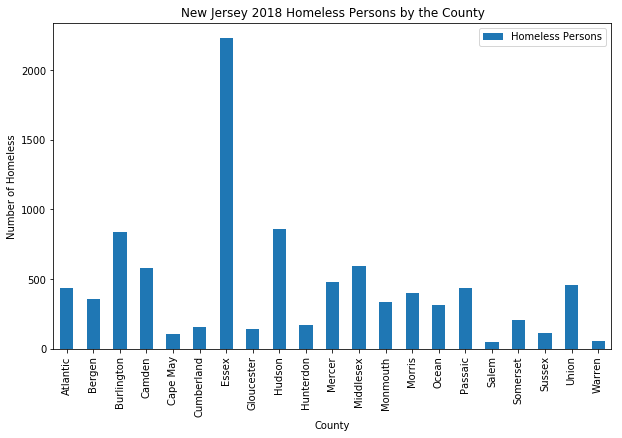

In [10]:
df_NJ_homeless.plot(kind='bar', figsize=(10, 6))

plt.xlabel('County') # add to x-label to the plot
plt.ylabel('Number of Homeless') # add y-label to the plot
plt.title('New Jersey 2018 Homeless Persons by the County') # add title to the plot

plt.show()

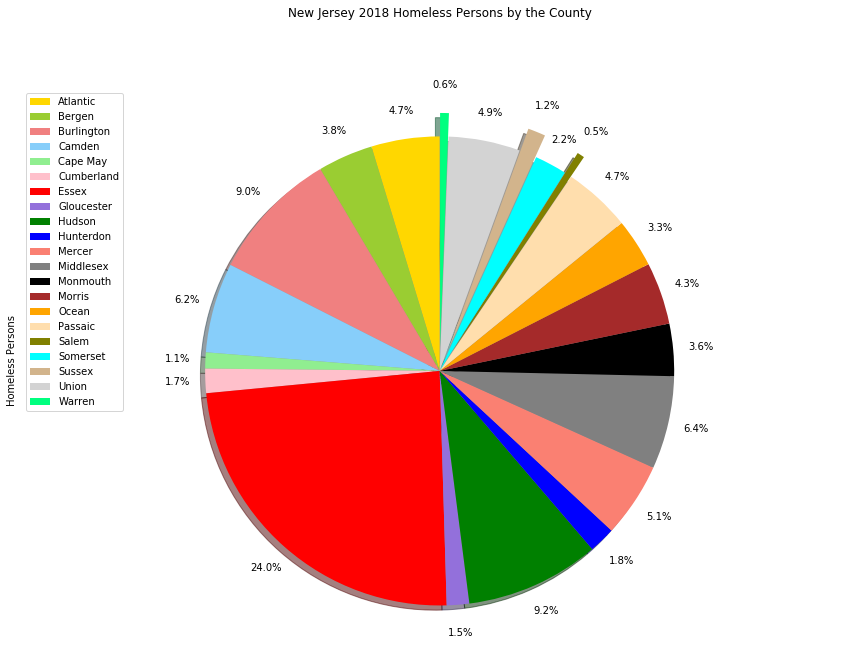

In [11]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen',
               'pink','red', 'mediumpurple', 'green','blue',
               'salmon', 'grey', 'black', 'brown','orange',
               'navajowhite', 'olive', 'cyan', 'tan', 'lightgray',
                'springgreen']
explode_list = [0, 0, 0, 0, 0,
                0, 0, 0, 0, 0,
                0, 0, 0, 0, 0,
                0, 0.1, 0, 0.1, 0,
                0.1] 

df_NJ_homeless['Homeless Persons'].plot(kind='pie',
                            figsize=(15, 10),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,
                            pctdistance=1.12,   
                            colors=colors_list,
                            explode=explode_list
                            )

# scale the title up by 12% to match pctdistance
plt.title('New Jersey 2018 Homeless Persons by the County', y=1.12) 
plt.axis('equal') 

# add legend
plt.legend(labels=df_NJ_homeless.index, loc='upper left') 

plt.show()

In [12]:

body = client_1e98d7e006194be1b6f357c229c1c2ff.get_object(Bucket='mycapstoneprojectweek2-donotdelete-pr-rga6hxdgkzhawg',Key='EssexHomeless.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_Essex_homeless = pd.read_csv(body)
df_Essex_homeless


,Figure i. Number of Homeless Persons by Municipality and Percentage of County Total,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Municipality,Total\rHomeless\rPersons,%of Total\rHomeless\rPersons,Sheltered\rHomeless\rPersons,%of\rSheltered\rHomeless\rPersons,Unsheltered\rHomeless\rPersons,%of\rUnsheltered\rHomeless\rPersons,NaN
1,Belleville,2,0%,0,0%,2,1%,NaN
2,Bloomfield,8,0%,0,0%,8,2%,NaN
3,City of Orange,18,1%,12,1%,6,2%,NaN
4,East Orange,95,4%,71,4%,24,6%,NaN
5,Fairfield,1,0%,0,0%,1,0%,NaN
6,Irvington,65,3%,53,3%,12,3%,NaN
7,Montclair,70,3%,54,3%,16,4%,NaN
8,Newark,1928,88%,1608,89%,320,81%,NaN
9,North\rCaldwell,1,0%,0,0%,1,0%,NaN


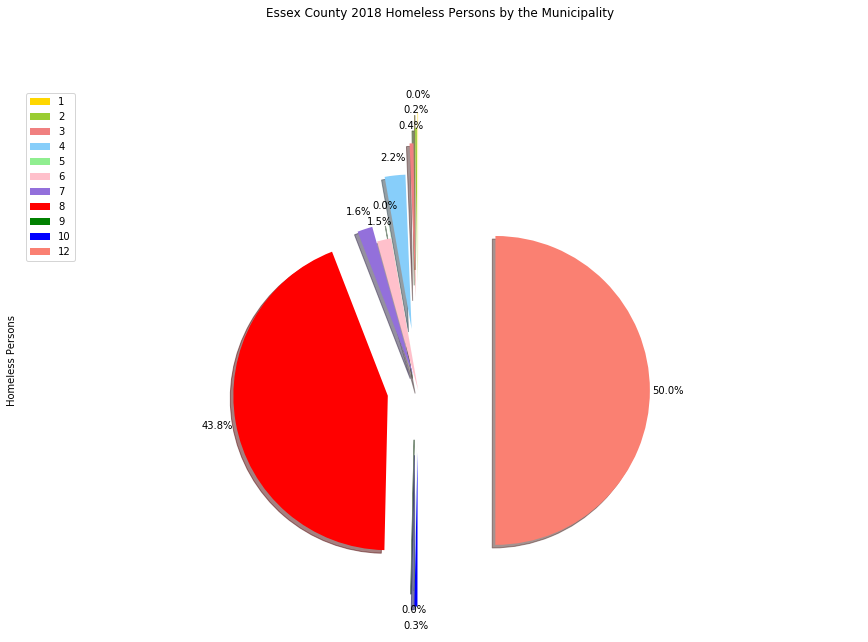

In [21]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen',
               'pink','mediumpurple','red', 'green','blue',
               'salmon']
explode_list = [0.8, 0.7, 0.6, 0.4, 0.1,
                0, 0.1, 0.2, 0.3
                , 0.4,
                0.5, ] 

df_Essex_homeless['Homeless Persons'].plot(kind='pie',
                            figsize=(15, 10),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,
                            pctdistance=1.12,   
                            colors=colors_list,
                            explode=explode_list
                            )

# scale the title up by 12% to match pctdistance
plt.title('Essex County 2018 Homeless Persons by the Municipality', y=1.12) 
plt.axis('equal') 

# add legend
plt.legend(labels=df_Essex_homeless.index, loc='upper left') 

plt.show()

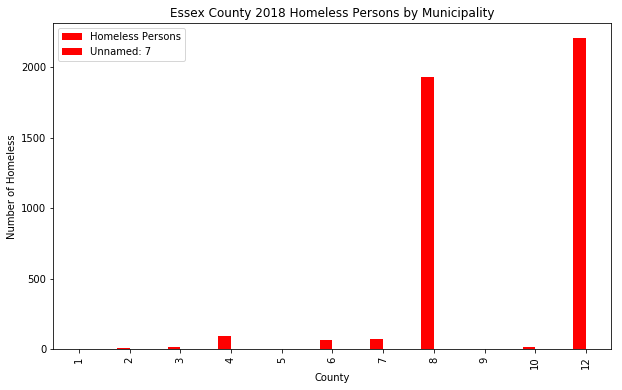

In [22]:
df_Essex_homeless.plot(kind='bar', color='red', figsize=(10, 6))

plt.xlabel('County') # add to x-label to the plot
plt.ylabel('Number of Homeless') # add y-label to the plot
plt.title('Essex County 2018 Homeless Persons by Municipality') # add title to the plot

plt.show()

In [24]:
body = client_1e98d7e006194be1b6f357c229c1c2ff.get_object(Bucket='mycapstoneprojectweek2-donotdelete-pr-rga6hxdgkzhawg',Key='GJUMC.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_GJUMC = pd.read_csv(body)
df_GJUMC.head()


,TOWN,CHURCH NAME,CHURCH NUMBER,DISTRICT
0,NEWARK,Almonesson UMC,1001,Gateway South
1,NEWARK,Audubon UMC,1002,Gateway South
2,NEWARK,Barnsboro UMC,1003,Gateway South
3,NEWARK,Mt Zion UMC (Barnsboro),1004,Gateway South
4,NEWARK,First UMC (Barrington),1005,Gateway South


In [25]:

body = client_1e98d7e006194be1b6f357c229c1c2ff.get_object(Bucket='mycapstoneprojectweek2-donotdelete-pr-rga6hxdgkzhawg',Key='GJUMCHomeless.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_GJUMC_homeless = pd.read_csv(body)
df_GJUMC_homeless


,TOWN,CHURCH NAME,CHURCH NUMBER,DISTRICT,Unnamed: 4
0,NEWARK,Franklin-St John's UMC (Newark),4043,Gateway North,NaN
1,NEWARK,St Matthew's UMC (Newark),4044,Gateway North,NaN
2,NEWARK,St Paul's Centenary UMC (Newark),4045,Gateway North,NaN
3,NEWARK,Trinity UMC (Newark),4046,Gateway North,NaN


In [26]:
df_GJUMC_homeless.loc[:,'ADDRESS'] = ['142 Maple Ave, Newark, NJ 07112',
                                      '150 S Orange Ave, Newark, NJ 07103',
                                      '741 Mt Prospect Ave, Newark, NJ 07104',
                                      '581 Clinton Ave, Newark, NJ 07108']

df_GJUMC_homeless.loc[:,'CHURCH NAME'] = df_GJUMC_homeless['CHURCH NAME'].str.replace('Newark','').str.replace('(','').str.replace(')','').str.rstrip()
df_GJUMC_homeless

,TOWN,CHURCH NAME,CHURCH NUMBER,DISTRICT,Unnamed: 4,ADDRESS
0,NEWARK,Franklin-St John's UMC,4043,Gateway North,NaN,"142 Maple Ave, Newark, NJ 07112"
1,NEWARK,St Matthew's UMC,4044,Gateway North,NaN,"150 S Orange Ave, Newark, NJ 07103"
2,NEWARK,St Paul's Centenary UMC,4045,Gateway North,NaN,"741 Mt Prospect Ave, Newark, NJ 07104"
3,NEWARK,Trinity UMC,4046,Gateway North,NaN,"581 Clinton Ave, Newark, NJ 07108"


In [28]:
import pandas as pd
from pandas import DataFrame
df_GJUMC_homeless = DataFrame ({'TOWN': ['NEWARK', 'NEWARK', 'NEWARK', 'NEWARK'],
                 'CHURCH NAME': ['Franklin-St Johns UMC', 'St Matthews UMC', 'St Pauls Centenary UMC', 'Trinity UMC'],
                 'CHURCH NUMBER': ['4043', '4044', '4045', '4046'],
                 'DISTRICT': ['Gateway North', 'Gateway North', 'Gateway North', 'Gateway North'],
                 'ADDRESS': ['142 Maple Ave, Newark, NJ 07112', '150 S Orange Ave, Newark, NJ 07103', '741 Mt Prospect Ave, Newark, NJ 07104', '581 Clinton Ave, Newark, NJ 07108']})
df_GJUMC_homeless

,TOWN,CHURCH NAME,CHURCH NUMBER,DISTRICT,ADDRESS
0,NEWARK,Franklin-St Johns UMC,4043,Gateway North,"142 Maple Ave, Newark, NJ 07112"
1,NEWARK,St Matthews UMC,4044,Gateway North,"150 S Orange Ave, Newark, NJ 07103"
2,NEWARK,St Pauls Centenary UMC,4045,Gateway North,"741 Mt Prospect Ave, Newark, NJ 07104"
3,NEWARK,Trinity UMC,4046,Gateway North,"581 Clinton Ave, Newark, NJ 07108"


In [31]:
church_lat = []
church_lon = []
for town, church, address in zip(df_GJUMC_homeless['TOWN'], df_GJUMC_homeless['CHURCH NAME'], df_GJUMC_homeless['ADDRESS']) :
    address = address
    geolocator = Nominatim(user_agent=town)
    location = geolocator.geocode(address)
    latitude = location.latitude
    church_lat.append(latitude)
    longitude = location.longitude
    church_lon.append(longitude)
   # print('The geograpical coordinate of ',church,' are {}, {}.'.format(latitude, longitude))   
df_GJUMC_homeless.loc[:,'LATITUDE'] = church_lat
df_GJUMC_homeless.loc[:,'LONGITUDE'] = church_lon
df_GJUMC_homeless

,TOWN,CHURCH NAME,CHURCH NUMBER,DISTRICT,ADDRESS,LATITUDE,LONGITUDE
0,NEWARK,Franklin-St Johns UMC,4043,Gateway North,"142 Maple Ave, Newark, NJ 07112",40.705355,-74.217858
1,NEWARK,St Matthews UMC,4044,Gateway North,"150 S Orange Ave, Newark, NJ 07103",40.731251,-74.229967
2,NEWARK,St Pauls Centenary UMC,4045,Gateway North,"741 Mt Prospect Ave, Newark, NJ 07104",40.777544,-74.164645
3,NEWARK,Trinity UMC,4046,Gateway North,"581 Clinton Ave, Newark, NJ 07108",40.722564,-74.205013


In [32]:
address = 'Newark, NJ'
geolocator = Nominatim(user_agent="newark_explorer")
location = geolocator.geocode(address)
Newark_lat = location.latitude
Newark_lon = location.longitude
print('The geograpical coordinate of Newark are {}, {}.'.format(Newark_lat, Newark_lon))

The geograpical coordinate of Newark are 40.735657, -74.1723667.


In [34]:
map_newark_church = folium.Map(location=[Newark_lat, Newark_lon], zoom_start=12.25)

for lat, lng, label in zip(df_GJUMC_homeless['LATITUDE'], df_GJUMC_homeless['LONGITUDE'], df_GJUMC_homeless['CHURCH NAME']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newark_church) 

locationlist = df_GJUMC_homeless[['LATITUDE','LONGITUDE']].values.tolist()
labels = df_GJUMC_homeless['CHURCH NAME'].values.tolist()


for point in range(len(locationlist)):
    popup = folium.Popup(labels[point], parse_html=True)
    folium.Marker(locationlist[point], popup=popup).add_to(map_newark_church)

map_newark_church

In [35]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [36]:
def get_foursquare_data(lat,lng):
    CLIENT_ID = '2DEBGD1XUKESJVIKXLXEFYLDOKIQW3GXBRGZL4MGNKFRGY5B'
    CLIENT_SECRET = 'JIWL2X23EEHQTL0KPXWQXCGPUGFJEFECLUYNIONMAKR4POW5'
    VERSION = '20180605'
    town_latitude = lat
    town_longitude = lng
    LIMIT = 1000 # limit of number of venues returned by Foursquare API
    radius = 2000 # define radius

    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        town_latitude, 
        town_longitude, 
        radius,
        LIMIT)
    results = requests.get(url).json()
    return results

In [37]:
def get_town_venues (jason_venues):
    town_venues = json_normalize(jason_venues) # flatten JSON

    # filter columns
    filtered_columns = ['venue.name', 'venue.location.formattedAddress', 'venue.location.city', 'venue.categories', 'venue.location.lat', 'venue.location.lng',
                          'venue.id']
    town_venues = town_venues.loc[:, filtered_columns]

    # filter the category for each row
    town_venues['venue.categories'] = town_venues.apply(get_category_type, axis=1)

    # clean columns
    town_venues.columns = [col.split(".")[-1] for col in town_venues.columns]

    town_venues.rename(columns={'formattedAddress': 'address'}, inplace=True)
    town_venues['address'] = town_venues.address.apply(lambda x: pd.Series(x[0]))
    town_venues.columns = map(str.upper, town_venues.columns)
     
    return town_venues

In [38]:
def get_contributor(town_venues,target_venue_type):
    for idx, venue in zip(town_venues.index.values, town_venues['CATEGORIES']) :
        i = -1
        c = 0
        while i == -1 and c != len(target_venue_type) :
             if venue.find(target_venue_type[c]) != -1 :
                i = 0
                town_venues.loc[idx,'CONTRIBUTOR'] = 'Yes'
                break
             elif c == len(target_venue_type) -1 :
                town_venues.loc[idx,'CONTRIBUTOR'] = 'No'
             c += 1
    town_venues_contrib = town_venues[town_venues['CONTRIBUTOR'] == 'Yes'].reset_index(drop = True)
        
    return town_venues_contrib

In [39]:
def agg_contributor(town_venues_contrib, similar_venue_types):
    for venue_types, venue_key in zip(similar_venue_types.values(), similar_venue_types.keys()):
        town_venues_contrib['CATEGORIES'] = town_venues_contrib.apply(lambda x: venue_key if x['CATEGORIES'] in venue_types else x['CATEGORIES'], axis=1)
    return town_venues_contrib

In [40]:
results_ewr = get_foursquare_data(Newark_lat,Newark_lon)

In [41]:
venues_ewr = results_ewr['response']['groups'][0]['items']
#venues_ewr

In [42]:
town_venues_ewr = get_town_venues(venues_ewr)
town_venues_ewr.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  from ipykernel import kernelapp as app


,NAME,ADDRESS,CITY,CATEGORIES,LAT,LNG,ID
0,Hobby's Delicatessen,32 Branford Pl (at Halsey St),Newark,Deli / Bodega,40.735048,-74.174395,4c2249077e85c9282cc6bb21
1,Fire Lounge,165 Mulberry St,Newark,Lounge,40.733834,-74.171394,4d25221ab9796dcb5c10a639
2,Halsey Deli,147 Halsey St (Acadamey Street),Newark,Deli / Bodega,40.737610,-74.172935,4bb49ee815809c7454881fdd
3,Prudential Center,25 Lafayette St (btwn Broad & Mulberry St),Newark,Hockey Arena,40.733608,-74.171155,49f754c1f964a520896c1fe3
4,Barnabas Health Hockey House,165 Mulberry St (at Lafayette St),Newark,Sporting Goods Shop,40.732685,-74.171708,4c562157973fc9287c5277c8


In [43]:

#### list can be added upon
target_venue_type = ['Deli', 
                     'Café',
                     'Restaurant', 
                     'Pizza Place',
                     'BBQ',
                     'Donut',
                     'Breakfast',
                     'Coffee Shop',
                     'Bakery'
                     'Sandwich Place']

#### Dictionary represent diffirent categories that needs to be aggregated to the same category type. This can be expanded.
similar_venue_types = {'Coffee Shop': ['Donut Shop', 'Breakfast Spot', 'Café', 'Bakery', 'Deli'],'Deli': ['Sandwich Place', 'Deli / Bodega']}

In [44]:

#### list can be added upon
target_venue_type = ['Deli', 
                     'Café',
                     'Restaurant', 
                     'Pizza Place',
                     'BBQ',
                     'Donut',
                     'Breakfast',
                     'Coffee Shop',
                     'Bakery'
                     'Sandwich Place']

#### Dictionary represent diffirent categories that needs to be aggregated to the same category type. This can be expanded.
similar_venue_types = {'Coffee Shop': ['Donut Shop', 'Breakfast Spot', 'Café', 'Bakery', 'Deli'],'Deli': ['Sandwich Place', 'Deli / Bodega']}

In [45]:
town_venue_ewr_contrib = get_contributor(town_venues_ewr, target_venue_type)
town_venue_ewr_contrib.head()

,NAME,ADDRESS,CITY,CATEGORIES,LAT,LNG,ID,CONTRIBUTOR
0,Hobby's Delicatessen,32 Branford Pl (at Halsey St),Newark,Deli / Bodega,40.735048,-74.174395,4c2249077e85c9282cc6bb21,Yes
1,Halsey Deli,147 Halsey St (Acadamey Street),Newark,Deli / Bodega,40.737610,-74.172935,4bb49ee815809c7454881fdd,Yes
2,Black Swan Espresso,93 Halsey Street,Newark,Coffee Shop,40.739107,-74.171974,5957e00435dfa7647d87d8ca,Yes
3,Blaze Pizza,"691 Broad St,",Newark,Pizza Place,40.738387,-74.170809,564d289b498ed4c6c2a4c28c,Yes
4,La Cocina,61 New St,Newark,Latin American Restaurant,40.740755,-74.172367,51087ab3e4b07566db03ce50,Yes


In [46]:
town_venue_ewr_contrib.CATEGORIES.unique()

array(['Deli / Bodega', 'Coffee Shop', 'Pizza Place',
       'Latin American Restaurant', 'BBQ Joint',
       'Mediterranean Restaurant', 'Spanish Restaurant', 'Donut Shop',
       'Cuban Restaurant', 'Mexican Restaurant', 'Brazilian Restaurant',
       'Halal Restaurant', 'Tapas Restaurant', 'Tex-Mex Restaurant',
       'Portuguese Restaurant', 'Italian Restaurant', 'Paella Restaurant',
       'Café', 'Seafood Restaurant', 'Restaurant', 'Korean Restaurant',
       'Middle Eastern Restaurant', 'American Restaurant'], dtype=object)

In [47]:
map_newark_target_venue = map_newark_church
# add markers to map
for lat, lng, label in zip(town_venue_ewr_contrib['LAT'], town_venue_ewr_contrib['LNG'], town_venue_ewr_contrib['NAME']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newark_target_venue)  
    
map_newark_target_venue

In [48]:

column = ['NAME','ADDRESS','CITY','CATEGORIES','LAT','LNG','ID', 'CHURCH', 'C_LAT', 'C_LNG'] 
town_venues_ewr_church = pd.DataFrame(columns=column)
town_venues_ewr_church

,NAME,ADDRESS,CITY,CATEGORIES,LAT,LNG,ID,CHURCH,C_LAT,C_LNG


In [49]:
for lat, lng, church in zip (df_GJUMC_homeless.LATITUDE, df_GJUMC_homeless.LONGITUDE, df_GJUMC_homeless['CHURCH NAME']):
    results = get_foursquare_data(lat,lng)
    venues = results['response']['groups'][0]['items']
    #venues_ewr_church =  venues_ewr_church + venues
    venues_ewr_church = get_town_venues(venues)
    venues_ewr_church.loc[ :,'CHURCH'] = church
    venues_ewr_church.loc[ :,'C_LAT'] = lat
    venues_ewr_church.loc[ :,'C_LNG'] = lat
    town_venues_ewr_church = town_venues_ewr_church.append(venues_ewr_church)

town_venues_ewr_church = town_venues_ewr_church.reset_index(drop=True)
town_venues_ewr_church.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  from ipykernel import kernelapp as app


,NAME,ADDRESS,CITY,CATEGORIES,LAT,LNG,ID,CHURCH,C_LAT,C_LNG
0,King's Family Restaurant,327 Lyons Ave,Newark,Southern / Soul Food Restaurant,40.712413,-74.218146,4e4c9d01bd413c4cc66abac9,Franklin-St Johns UMC,40.705355,40.705355
1,Long Ave BBQ,166 Long Ave,Hillside,BBQ Joint,40.696147,-74.227328,4b992137f964a520616335e3,Franklin-St Johns UMC,40.705355,40.705355
2,SuperFresh Supermarket,471 Lyons Ave,Irvington,Grocery Store,40.716162,-74.223357,576c8bafcd109214748d89dd,Franklin-St Johns UMC,40.705355,40.705355
3,Carlies,1555 Summit Ave,Hillside,Bar,40.705943,-74.224990,4d0c2987f393224b1de214ee,Franklin-St Johns UMC,40.705355,40.705355
4,Weequahic Park,Weequahic Park Dr,Newark,Park,40.703155,-74.199429,4bd227559854d13a6617fb4d,Franklin-St Johns UMC,40.705355,40.705355


In [50]:
town_venues_ewr_church.shape

(342, 10)

In [51]:
ewr_church_contrib = get_contributor(town_venues_ewr_church,target_venue_type)
ewr_church_contrib = agg_contributor(ewr_church_contrib,similar_venue_types)
##### Since were getting venues with 2000 meters from each church, we might run into overalapping venues.
##### We need to drop duplicate venue ids and lets drop venues that are not located in NEWARK.
ewr_church_contrib.drop_duplicates(subset=['ID'], keep='first')
ewr_church_contrib = ewr_church_contrib[ewr_church_contrib['CITY'] == 'Newark'].reset_index(drop = True)
ewr_church_contrib.head()

,NAME,ADDRESS,CITY,CATEGORIES,LAT,LNG,ID,CHURCH,C_LAT,C_LNG,CONTRIBUTOR
0,King's Family Restaurant,327 Lyons Ave,Newark,Southern / Soul Food Restaurant,40.712413,-74.218146,4e4c9d01bd413c4cc66abac9,Franklin-St Johns UMC,40.705355,40.705355,Yes
1,Bragman's Deli,393 Hawthorne Ave,Newark,Deli,40.718150,-74.209896,4b8f090cf964a520ca4533e3,Franklin-St Johns UMC,40.705355,40.705355,Yes
2,Wendy's,462 Chancellor Ave,Newark,Fast Food Restaurant,40.712014,-74.226921,4bfec510e584c9286f356d25,Franklin-St Johns UMC,40.705355,40.705355,Yes
3,Dunkin',257 Lyons Ave #259,Newark,Coffee Shop,40.711370,-74.215736,4bc9fce70687ef3b63f4dacc,Franklin-St Johns UMC,40.705355,40.705355,Yes
4,Domino's Pizza,1003 Bergen St,Newark,Pizza Place,40.709817,-74.207055,4d41f0acaed776ebaf9c6997,Franklin-St Johns UMC,40.705355,40.705355,Yes


In [52]:
ewr_church_contrib.shape

(51, 11)

In [53]:
#### write to output to xls file
ewr_church_contrib.to_excel('ewr_church_contrib.xlsx')

In [54]:
map_newark_church = folium.Map(location=[Newark_lat, Newark_lon], zoom_start=12.25)

for lat, lng, label in zip(df_GJUMC_homeless['LATITUDE'], df_GJUMC_homeless['LONGITUDE'], df_GJUMC_homeless['CHURCH NAME']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newark_church) 

locationlist = df_GJUMC_homeless[['LATITUDE','LONGITUDE']].values.tolist()
labels = df_GJUMC_homeless['CHURCH NAME'].values.tolist()


for point in range(len(locationlist)):
    popup = folium.Popup(labels[point], parse_html=True)
    folium.Marker(locationlist[point], popup=popup).add_to(map_newark_church)

for lat, lng, label in zip(ewr_church_contrib['LAT'], ewr_church_contrib['LNG'], ewr_church_contrib['NAME']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        fill=True,
        color = 'red',
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newark_church) 
    
map_newark_church

In [55]:
ewr_onehot = pd.get_dummies(ewr_church_contrib[['CATEGORIES']], prefix="", prefix_sep="")
ewr_onehot['CHURCH'] = ewr_church_contrib['CHURCH'] 
fixed_columns = [ewr_onehot.columns[-1]] + list(ewr_onehot.columns[:-1])
ewr_onehot = ewr_onehot[fixed_columns]
ewr_onehot.head()

,CHURCH,American Restaurant,BBQ Joint,Brazilian Restaurant,Caribbean Restaurant,Chinese Restaurant,Coffee Shop,Comfort Food Restaurant,Cuban Restaurant,Deli,Fast Food Restaurant,Italian Restaurant,Mexican Restaurant,Paella Restaurant,Pizza Place,Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant
0,Franklin-St Johns UMC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,Franklin-St Johns UMC,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,Franklin-St Johns UMC,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,Franklin-St Johns UMC,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,Franklin-St Johns UMC,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [56]:
def cluster (k, df_preK, df_preK_onehot):
   # kclusters = k
    df_postK = df_preK.copy()
    grouped_clustering = df_preK_onehot.drop('CHURCH', 1)

    # run k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=0).fit(grouped_clustering)

    # check cluster labels generated for each row in the dataframe
    kmeans.labels_[0:-1] 
    
    df_postK.insert(0, 'CLUSTER', kmeans.labels_)
    df_clustered_K = df_postK
    #kclusters = 0
    return df_clustered_K

In [57]:
def map_cluster(k, df):
    map_cluster = map_newark_church
    # set color scheme for the clusters
    x = np.arange(k)
    ys = [i + x + (i*x)**2 for i in range(k)]
    colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
    rainbow = [colors.rgb2hex(i) for i in colors_array]

    # add markers to the map
    markers_colors = []
    for lat, lon, poi, cluster in zip(df['LAT'], df['LNG'], df['CHURCH'], df['CLUSTER']):
        label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=label,
            color=rainbow[cluster-1],
            fill=True,
            fill_color=rainbow[cluster-1],
            fill_opacity=0.7).add_to(map_cluster)

    return map_cluster

In [58]:
ewr_church_contrib_k4 = cluster(4,ewr_church_contrib, ewr_onehot)
ewr_church_contrib_k4.sort_values(by='CLUSTER')

,CLUSTER,NAME,ADDRESS,CITY,CATEGORIES,LAT,LNG,ID,CHURCH,C_LAT,C_LNG,CONTRIBUTOR
0,0,King's Family Restaurant,327 Lyons Ave,Newark,Southern / Soul Food Restaurant,40.712413,-74.218146,4e4c9d01bd413c4cc66abac9,Franklin-St Johns UMC,40.705355,40.705355,Yes
48,0,Ademis Grocery,146 Sherman Ave (Vanderpool Street),Newark,Deli,40.720064,-74.186632,4d961f91af3d236a0c8d02c7,Trinity UMC,40.722564,40.722564,Yes
45,0,Lucky Fox's Supermarket,162 Irvine Turner Blvd (18th Avenue),Newark,Deli,40.729145,-74.190752,4f0af386e4b0e624d9a08404,Trinity UMC,40.722564,40.722564,Yes
37,0,Qdoba Mexican Grill,10 Toler Pl (Space A6G - Terminal A),Newark,Mexican Restaurant,40.716644,-74.182910,52aa5a9a11d2570bb74bc16d,Trinity UMC,40.722564,40.722564,Yes
36,0,Vonda's Kitchen,183 W Kinney St,Newark,American Restaurant,40.731220,-74.185046,4f8f0615e4b0d7a441ec1763,Trinity UMC,40.722564,40.722564,Yes
32,0,Bragman's Deli,393 Hawthorne Ave,Newark,Deli,40.718150,-74.209896,4b8f090cf964a520ca4533e3,Trinity UMC,40.722564,40.722564,Yes
31,0,King's Family Restaurant,327 Lyons Ave,Newark,Southern / Soul Food Restaurant,40.712413,-74.218146,4e4c9d01bd413c4cc66abac9,Trinity UMC,40.722564,40.722564,Yes
29,0,Kings Restaurant,557 Clinton Ave,Newark,Restaurant,40.722291,-74.203753,4c0e7b522466a593a51f7921,Trinity UMC,40.722564,40.722564,Yes
28,0,Leo's Café & El Guame Restaurant,598 Broadway,Newark,Spanish Restaurant,40.770961,-74.162746,4ca617e17334236acd4f1c58,St Pauls Centenary UMC,40.777544,40.777544,Yes
49,0,Golden Krust Caribbean Restaurant,467 Lyons Ave.,Newark,Caribbean Restaurant,40.715278,-74.222608,4c9397ba94a0236acb908412,Trinity UMC,40.722564,40.722564,Yes


In [59]:
map_cluster(4,ewr_church_contrib_k4)

In [60]:
ewr_church_contrib_k5 = cluster(5, ewr_church_contrib, ewr_onehot)
ewr_church_contrib_k5.sort_values(by='CLUSTER')

,CLUSTER,NAME,ADDRESS,CITY,CATEGORIES,LAT,LNG,ID,CHURCH,C_LAT,C_LNG,CONTRIBUTOR
0,0,King's Family Restaurant,327 Lyons Ave,Newark,Southern / Soul Food Restaurant,40.712413,-74.218146,4e4c9d01bd413c4cc66abac9,Franklin-St Johns UMC,40.705355,40.705355,Yes
37,0,Qdoba Mexican Grill,10 Toler Pl (Space A6G - Terminal A),Newark,Mexican Restaurant,40.716644,-74.182910,52aa5a9a11d2570bb74bc16d,Trinity UMC,40.722564,40.722564,Yes
36,0,Vonda's Kitchen,183 W Kinney St,Newark,American Restaurant,40.731220,-74.185046,4f8f0615e4b0d7a441ec1763,Trinity UMC,40.722564,40.722564,Yes
31,0,King's Family Restaurant,327 Lyons Ave,Newark,Southern / Soul Food Restaurant,40.712413,-74.218146,4e4c9d01bd413c4cc66abac9,Trinity UMC,40.722564,40.722564,Yes
29,0,Kings Restaurant,557 Clinton Ave,Newark,Restaurant,40.722291,-74.203753,4c0e7b522466a593a51f7921,Trinity UMC,40.722564,40.722564,Yes
28,0,Leo's Café & El Guame Restaurant,598 Broadway,Newark,Spanish Restaurant,40.770961,-74.162746,4ca617e17334236acd4f1c58,St Pauls Centenary UMC,40.777544,40.777544,Yes
49,0,Golden Krust Caribbean Restaurant,467 Lyons Ave.,Newark,Caribbean Restaurant,40.715278,-74.222608,4c9397ba94a0236acb908412,Trinity UMC,40.722564,40.722564,Yes
23,0,Stephanie's BBQ IV,687 N 6th St (at Davenport Ave.),Newark,BBQ Joint,40.772650,-74.179385,4e3c3320fa76455375a6fae2,St Pauls Centenary UMC,40.777544,40.777544,Yes
21,0,Luigi's Restaurant,561 Bloomfield Ave,Newark,Italian Restaurant,40.774202,-74.185984,4e4e5aa0bd4101d0d7a85bb2,St Pauls Centenary UMC,40.777544,40.777544,Yes
19,0,Bloomfield Avenue B.B.Q.,391 Bloomfield Ave,Newark,Brazilian Restaurant,40.768823,-74.182088,4cc9b77f41e75481e4315e84,St Pauls Centenary UMC,40.777544,40.777544,Yes


In [61]:
map_cluster(5,ewr_church_contrib_k5)

In [62]:
ewr_church_contrib_k6 = cluster(6, ewr_church_contrib, ewr_onehot)
ewr_church_contrib_k6.sort_values(by='CLUSTER')

,CLUSTER,NAME,ADDRESS,CITY,CATEGORIES,LAT,LNG,ID,CHURCH,C_LAT,C_LNG,CONTRIBUTOR
50,0,"NA""JAYYAH","Newark, NJ",Newark,American Restaurant,40.708821,-74.220234,544d4e0e498e45ba3006740a,Trinity UMC,40.722564,40.722564,Yes
29,0,Kings Restaurant,557 Clinton Ave,Newark,Restaurant,40.722291,-74.203753,4c0e7b522466a593a51f7921,Trinity UMC,40.722564,40.722564,Yes
28,0,Leo's Café & El Guame Restaurant,598 Broadway,Newark,Spanish Restaurant,40.770961,-74.162746,4ca617e17334236acd4f1c58,St Pauls Centenary UMC,40.777544,40.777544,Yes
49,0,Golden Krust Caribbean Restaurant,467 Lyons Ave.,Newark,Caribbean Restaurant,40.715278,-74.222608,4c9397ba94a0236acb908412,Trinity UMC,40.722564,40.722564,Yes
23,0,Stephanie's BBQ IV,687 N 6th St (at Davenport Ave.),Newark,BBQ Joint,40.772650,-74.179385,4e3c3320fa76455375a6fae2,St Pauls Centenary UMC,40.777544,40.777544,Yes
21,0,Luigi's Restaurant,561 Bloomfield Ave,Newark,Italian Restaurant,40.774202,-74.185984,4e4e5aa0bd4101d0d7a85bb2,St Pauls Centenary UMC,40.777544,40.777544,Yes
19,0,Bloomfield Avenue B.B.Q.,391 Bloomfield Ave,Newark,Brazilian Restaurant,40.768823,-74.182088,4cc9b77f41e75481e4315e84,St Pauls Centenary UMC,40.777544,40.777544,Yes
36,0,Vonda's Kitchen,183 W Kinney St,Newark,American Restaurant,40.731220,-74.185046,4f8f0615e4b0d7a441ec1763,Trinity UMC,40.722564,40.722564,Yes
17,0,Taino's Kitchen,849 Mount Prospect Ave,Newark,Spanish Restaurant,40.781322,-74.162537,5562359d498e30fbab34b937,St Pauls Centenary UMC,40.777544,40.777544,Yes
14,0,Omar's Café,646 Mount Prospect Ave,Newark,Cuban Restaurant,40.774208,-74.166594,4c8a4b1e52a98cfaa61f2be9,St Pauls Centenary UMC,40.777544,40.777544,Yes


In [63]:
map_cluster(6,ewr_church_contrib_k6)

In [64]:
ewr_church_contrib_k5.loc[ewr_church_contrib_k5['CLUSTER'] == 0, ewr_church_contrib_k5.columns[[1,2,3,4,8]]]

,NAME,ADDRESS,CITY,CATEGORIES,CHURCH
0,King's Family Restaurant,327 Lyons Ave,Newark,Southern / Soul Food Restaurant,Franklin-St Johns UMC
6,Amin's Fongyip Chinese Muslim,430 Chancellor Ave,Newark,Chinese Restaurant,Franklin-St Johns UMC
7,Golden Krust Caribbean Restaurant,467 Lyons Ave.,Newark,Caribbean Restaurant,Franklin-St Johns UMC
9,Panda garden,505 Irvington Ave,Newark,Chinese Restaurant,St Matthews UMC
10,Soul Food Factory,683 Springfield Ave,Newark,Southern / Soul Food Restaurant,St Matthews UMC
11,D & J Country Cooking,363 Madison Ave (18th Street),Newark,Comfort Food Restaurant,St Matthews UMC
14,Omar's Café,646 Mount Prospect Ave,Newark,Cuban Restaurant,St Pauls Centenary UMC
17,Taino's Kitchen,849 Mount Prospect Ave,Newark,Spanish Restaurant,St Pauls Centenary UMC
18,Spanish Manor Restaurant,246 Heller Pkwy,Newark,Paella Restaurant,St Pauls Centenary UMC
19,Bloomfield Avenue B.B.Q.,391 Bloomfield Ave,Newark,Brazilian Restaurant,St Pauls Centenary UMC


In [65]:
ewr_church_contrib_k5.loc[ewr_church_contrib_k5['CLUSTER'] == 2, ewr_church_contrib_k5.columns[[1,2,3,4,8]]]

,NAME,ADDRESS,CITY,CATEGORIES,CHURCH
2,Wendy's,462 Chancellor Ave,Newark,Fast Food Restaurant,Franklin-St Johns UMC
8,McDonald's,915 18th Ave,Newark,Fast Food Restaurant,St Matthews UMC
13,White Castle,642-654 Broadway,Newark,Fast Food Restaurant,St Pauls Centenary UMC
27,McDonald's,621 Broadway,Newark,Fast Food Restaurant,St Pauls Centenary UMC
33,White Castle,307 Elizabeth Ave,Newark,Fast Food Restaurant,Trinity UMC
34,Wendy's,427 Springfield Avenue,Newark,Fast Food Restaurant,Trinity UMC
40,SONIC Drive In,189-237 Springfield Ave (Irvine Turner),Newark,Fast Food Restaurant,Trinity UMC
43,Jersey Fried Chicken,289 Elizabeth Ave,Newark,Fast Food Restaurant,Trinity UMC
44,McDonald's,101-115 Clinton Ave,Newark,Fast Food Restaurant,Trinity UMC
47,Burger King,10 Toler Pl,Newark,Fast Food Restaurant,Trinity UMC


In [66]:
ewr_church_contrib_k5.loc[ewr_church_contrib_k5['CLUSTER'] == 3, ewr_church_contrib_k5.columns[[1,2,3,4,8]]]

,NAME,ADDRESS,CITY,CATEGORIES,CHURCH
4,Domino's Pizza,1003 Bergen St,Newark,Pizza Place,Franklin-St Johns UMC
5,Napoli Pizzeria,74 Lyons Ave,Newark,Pizza Place,Franklin-St Johns UMC
16,Gencarelli's Bar & Grill,501 Bloomfield Ave (btwn N 10th & N 11th St.),Newark,Pizza Place,St Pauls Centenary UMC
24,Domino's Pizza,551 Bloomfield Ave,Newark,Pizza Place,St Pauls Centenary UMC
25,Pizza Hut,487 Bloomfield Ave.,Newark,Pizza Place,St Pauls Centenary UMC
26,Papa John's Pizza,451 Bloomfield Ave (Bloomfield Ave),Newark,Pizza Place,St Pauls Centenary UMC
39,Domino's Pizza,1003 Bergen St,Newark,Pizza Place,Trinity UMC
46,Napoli Pizzeria,74 Lyons Ave,Newark,Pizza Place,Trinity UMC


In [67]:
ewr_church_contrib_k5.loc[ewr_church_contrib_k5['CLUSTER'] == 4, ewr_church_contrib_k5.columns[[1,2,3,4,8]]]

,NAME,ADDRESS,CITY,CATEGORIES,CHURCH
1,Bragman's Deli,393 Hawthorne Ave,Newark,Deli,Franklin-St Johns UMC
32,Bragman's Deli,393 Hawthorne Ave,Newark,Deli,Trinity UMC
45,Lucky Fox's Supermarket,162 Irvine Turner Blvd (18th Avenue),Newark,Deli,Trinity UMC
48,Ademis Grocery,146 Sherman Ave (Vanderpool Street),Newark,Deli,Trinity UMC


In [68]:
Franklin_St_John_UMC_venue = ewr_church_contrib_k5.loc[ewr_church_contrib_k5['CHURCH'] == 'Franklin-St John\'s UMC', ewr_church_contrib_k5.columns[[0,1,2,3,4,8]]].sort_values(by = 'CLUSTER')
Franklin_St_John_UMC_venue

,CLUSTER,NAME,ADDRESS,CITY,CATEGORIES,CHURCH


In [69]:
Franklin_St_John_UMC_venue.shape

(0, 6)

In [70]:
St_Matthew_UMC_venue = ewr_church_contrib_k5.loc[ewr_church_contrib_k5['CHURCH'] == 'St Matthew\'s UMC', ewr_church_contrib_k5.columns[[0,1,2,3,4,8]]].sort_values(by = 'CLUSTER')
St_Matthew_UMC_venue

,CLUSTER,NAME,ADDRESS,CITY,CATEGORIES,CHURCH


In [71]:
St_Matthew_UMC_venue.shape

(0, 6)

In [72]:
St_Paul_Centenary_UMC = ewr_church_contrib_k5.loc[ewr_church_contrib_k5['CHURCH'] == 'St Paul\'s Centenary UMC', ewr_church_contrib_k5.columns[[0,1,2,3,4,8]]].sort_values(by = 'CLUSTER')
St_Paul_Centenary_UMC

,CLUSTER,NAME,ADDRESS,CITY,CATEGORIES,CHURCH


In [73]:
St_Paul_Centenary_UMC.shape

(0, 6)

In [74]:
Trinity_UMC_venue = ewr_church_contrib_k5.loc[ewr_church_contrib_k5['CHURCH'] == 'Trinity UMC', ewr_church_contrib_k5.columns[[0,1,2,3,4,8]]].sort_values(by = 'CLUSTER')
Trinity_UMC_venue

,CLUSTER,NAME,ADDRESS,CITY,CATEGORIES,CHURCH
29,0,Kings Restaurant,557 Clinton Ave,Newark,Restaurant,Trinity UMC
49,0,Golden Krust Caribbean Restaurant,467 Lyons Ave.,Newark,Caribbean Restaurant,Trinity UMC
37,0,Qdoba Mexican Grill,10 Toler Pl (Space A6G - Terminal A),Newark,Mexican Restaurant,Trinity UMC
36,0,Vonda's Kitchen,183 W Kinney St,Newark,American Restaurant,Trinity UMC
50,0,"NA""JAYYAH","Newark, NJ",Newark,American Restaurant,Trinity UMC
31,0,King's Family Restaurant,327 Lyons Ave,Newark,Southern / Soul Food Restaurant,Trinity UMC
42,1,Dunkin',10 Toler Pl,Newark,Coffee Shop,Trinity UMC
35,1,Dunkin',"311 Springfield Ave, #313 (at Hunterdon St)",Newark,Coffee Shop,Trinity UMC
38,1,Dunkin',226 Elizabeth Ave #232,Newark,Coffee Shop,Trinity UMC
30,1,Nubian Family Flavor,410 Springfield Ave,Newark,Coffee Shop,Trinity UMC


In [75]:
Trinity_UMC_venue.shape

(22, 6)

In [76]:
ewr_church_contrib_k5.sort_values(by='CLUSTER').to_excel('ewr_church_contrib_k5.xlsx')